In [1]:
import pandas as pd
%pylab inline
%load_ext autoreload
%autoreload 2
#%matplotlib nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

from UKMovementSensing import hsmm

In [3]:
datadir = "/media/sf_VBox_Shared/London/raw/first5/subsets"
path_to_file5sec = os.path.join(datadir, "0__016566_2015-03-24 14-52-30.bin_day1.csv")

In [4]:
filenames = os.listdir(datadir)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(datadir,fn))]
datasets = [pd.read_csv(os.path.join(datadir,fn)) for fn in filenames]
print(len(datasets))

11


In [5]:
for i in range(len(datasets)):
    datasets[i] = datasets[i].set_index('timestamp')
    datasets[i].index = pd.to_datetime(datasets[i].index) 
    #datasets[i]['Activity'] = [str(a) for a in datasets[i]['Activity']]
    #datasets[i]['filename'] = filenames[i] #TODO weghalen voor nieuwe data

In [6]:
example_index = 2
day1_5sec = datasets[example_index]

print(min(day1_5sec.index))
print(max(day1_5sec.index))
day1_5sec.head()

2015-03-05 04:00:00
2015-03-06 03:59:55


,acceleration,EN,anglex,angley,anglez,roll_med_acc_x,roll_med_acc_y,roll_med_acc_z,dev_roll_med_acc_x,dev_roll_med_acc_y,dev_roll_med_acc_z,invalid,filename,Slot,act,act_label,start_time,subset,switched_pos
timestamp,,,,,,,,,,,,,,,,,,,
2015-03-05 04:00:00,0.003365,0.996340,-65.315964,12.839137,-20.705795,-0.904853,0.221299,-0.352103,-0.001102,0.001002,0.003621,0,__016580_2015-03-12 09-09-15.bin_day1,1,1.0,Sleeping and resting (including sick in bed),2015-03-05 04:00:00+00:00,0,False
2015-03-05 04:00:05,0.003278,0.998538,-62.658269,13.348475,-23.393921,-0.886729,0.230470,-0.396355,0.002263,0.001669,-0.004457,0,__016580_2015-03-12 09-09-15.bin_day1,1,1.0,Sleeping and resting (including sick in bed),2015-03-05 04:00:00+00:00,0,False
2015-03-05 04:00:10,0.002431,0.998578,-62.733459,13.280806,-23.351338,-0.887516,0.229370,-0.395758,-0.000157,-0.000412,-0.000040,0,__016580_2015-03-12 09-09-15.bin_day1,1,1.0,Sleeping and resting (including sick in bed),2015-03-05 04:00:00+00:00,0,False
2015-03-05 04:00:15,0.001929,0.998130,-62.790675,13.155759,-23.364066,-0.887516,0.227132,-0.395758,0.000197,0.000648,-0.000378,0,__016580_2015-03-12 09-09-15.bin_day1,1,1.0,Sleeping and resting (including sick in bed),2015-03-05 04:00:00+00:00,0,False
2015-03-05 04:00:20,0.002238,0.998390,-62.790675,13.155759,-23.364066,-0.887516,0.227132,-0.395758,0.000000,0.000668,-0.000577,0,__016580_2015-03-12 09-09-15.bin_day1,1,1.0,Sleeping and resting (including sick in bed),2015-03-05 04:00:00+00:00,0,False


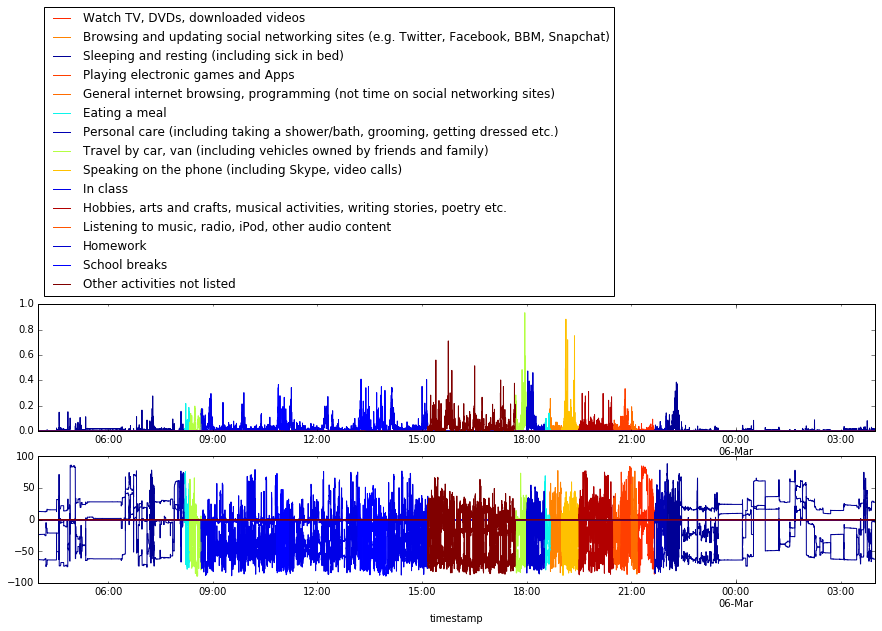

In [7]:
#byAct = day1_5sec.groupby('Activity')
nmax = int(max(day1_5sec['act']))+1
colours = plt.cm.jet(np.linspace(0, 1, nmax))
colormap = {i: colours[i] for i in range(nmax)}

activities = set(day1_5sec['act_label'])
fig, axes = plt.subplots(2, figsize=(15,5))
for act in activities:
    dfa = day1_5sec.copy()
    dfa[dfa['act_label']!=act] = 0
    color = colormap[dfa[dfa['act_label']==act]['act'][0]]
    dfa['acceleration'].plot(label=act, color=color, ax=axes[0])
    dfa['anglex'].plot(color=color, ax=axes[1])
    dfa['angley'].plot(color=color, ax=axes[1])
    dfa['anglez'].plot(color=color, ax=axes[1])
axes[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3);

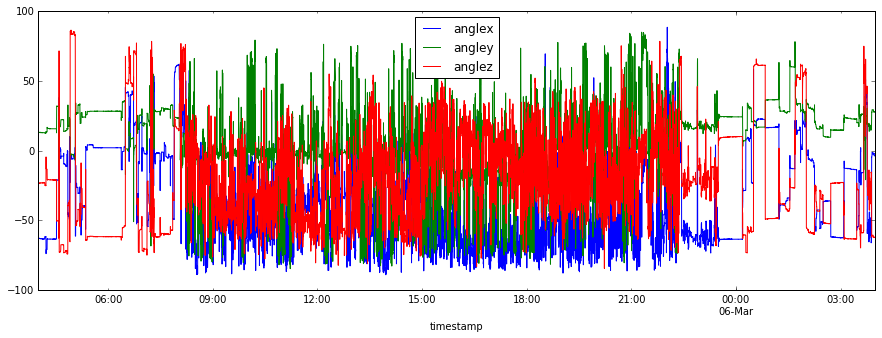

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
day1_5sec[['anglex', 'angley', 'anglez']].plot(ax=ax)

In [9]:
X_list = [np.column_stack([d.anglex, d.angley, d.anglez, d.acceleration]) for d in datasets] #, day1_5sec.acceleration])
column_names = ['anglex', 'angley', 'anglez', 'acceleration']
print(column_names)

['anglex', 'angley', 'anglez', 'acceleration']


In [10]:
X = X_list[example_index]
print(X.shape)

(17280, 4)


## Create and train the model

In [11]:
Nmax = 4
dim = X.shape[1]

In [12]:
model, model_dist = hsmm.train_hsmm(X_list[:2], Nmax=Nmax, nr_resamples=1, trunc=600, visualize=False, example_index=example_index)

/home/dafne/anaconda2/envs/ucl2/lib/python2.7/site-packages/pybasicbayes/util/stats.py:185: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x = np.random.randn(nu,n)


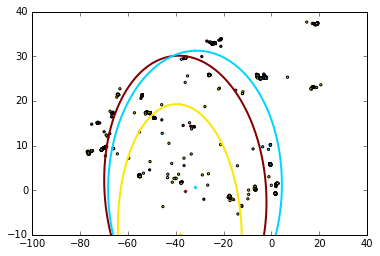

In [13]:
model.plot_observations(plot_slice=slice(1000));

In [20]:
model.states_list = []

In [21]:
model.datas
#model.datas[0].shape

[]

In [70]:
import pyhsmm
model_new = pyhsmm.models.WeakLimitHDPHSMM(obs_distns=model.obs_distns, 
                                           dur_distns=model.dur_distns, 
                                           trans_distn=model.trans_distn)

In [43]:
[d.lmbda for d in model_new.dur_distns]
d.

[364.75553211224195, 357.9395586562511, 348.2672746565745, 370.836091545481]

In [71]:
print('model1')
states1 = model.predict(X, 0, T=600)
print('model2')
states2 = model_new.predict(X, 0, T=600) #X.shape[0])

model1
model2


In [57]:
%debug

> /home/dafne/anaconda2/envs/ucl2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py(895)_logsf()
    893 
    894     def _logsf(self, x, *args):
--> 895         return log(self._sf(x, *args))
    896 
    897     def _ppf(self, q, *args):

ipdb> x
array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         1.72770000e+04,   1.72780000e+04,   1.72790000e+04])
ipdb> q


In [72]:
print(states1[0].shape, states1[1].shape)
print(states2[0].shape, states2[1].shape)

((17280, 4), (17280,))
((17280, 4), (17280,))


In [73]:
print(np.all(states1[0] == states2[0]))
print(np.all(states1[1] == states2[1]))

True
False


In [74]:
np.mean(states1[1]==states2[1])

0.953125

In [16]:
d_old = model_dist[0]
for j, d in enumerate(model_dist):
    #print d[0].mu
    diff = np.array([np.sqrt(np.sum(np.square(d[i].mu - d_old[i].mu))) for i in range(len(d))])
    print(j, np.mean(diff))
    d_old = d

(0, 0.0)
(1, 19.315686459494202)
(2, 10.940586103003602)
(3, 7.021293254117559)
(4, 4.0804128808738094)
(5, 2.3580530715327703)
(6, 2.1095596956235356)
(7, 1.777972077633311)
(8, 1.3901669512029382)
(9, 1.3115467276343216)
(10, 1.0062148019835759)
(11, 0.87658677732813861)
(12, 0.77142959332885608)
(13, 0.63190185988438163)
(14, 0.75954548968079638)


In [22]:
import pickle
#TODO: the model object also contains the data so this is not very efficient
modelpath = os.getcwd() #os.path.join(datadir, 'models')
if not os.path.exists(modelpath):
        os.makedirs(modelpath)
with open(os.path.join(modelpath, 'model_{}states.pkl'.format(Nmax)), 'wb') as f:
    pickle.dump(model, file=f)

In [ ]:
import pickle
with open(os.path.join(datadir, 'models/model_{}states.pkl'.format(Nmax)), 'r') as f:
    model = pickle.load(file=f)

In [18]:
data = day1_5sec
hidden_states = model.stateseqs[example_index]

In [22]:
#Save the data with the states
outputpath = os.path.join(datadir,'datawithstates/')
if not os.path.exists(outputpath):
        os.makedirs(outputpath)
for i, dat in enumerate(datasets):
    dat['state'] = model.stateseqs[i]
    fn = str(str(dat['subset'][0]) + dat['filename'][0])+'.csv'
    dat.to_csv(os.path.join(outputpath, fn))

In [23]:
colormap, cmap = hsmm.get_color_map(Nmax)

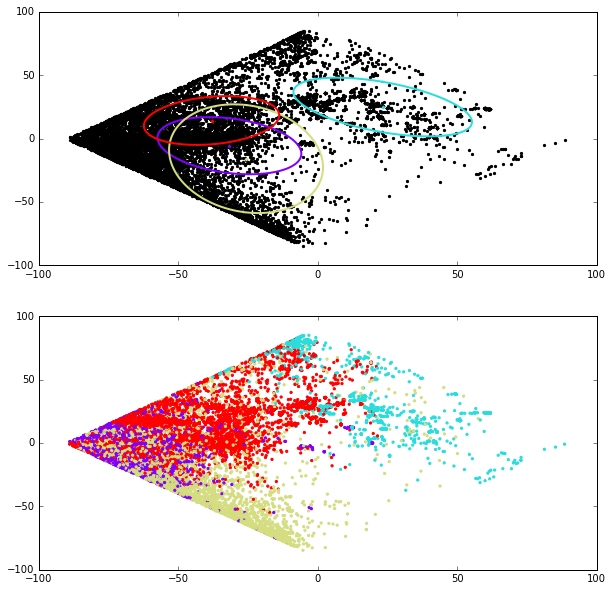

In [25]:
hsmm.plot_observations(X, 0, 1, model, hidden_states, Nmax)

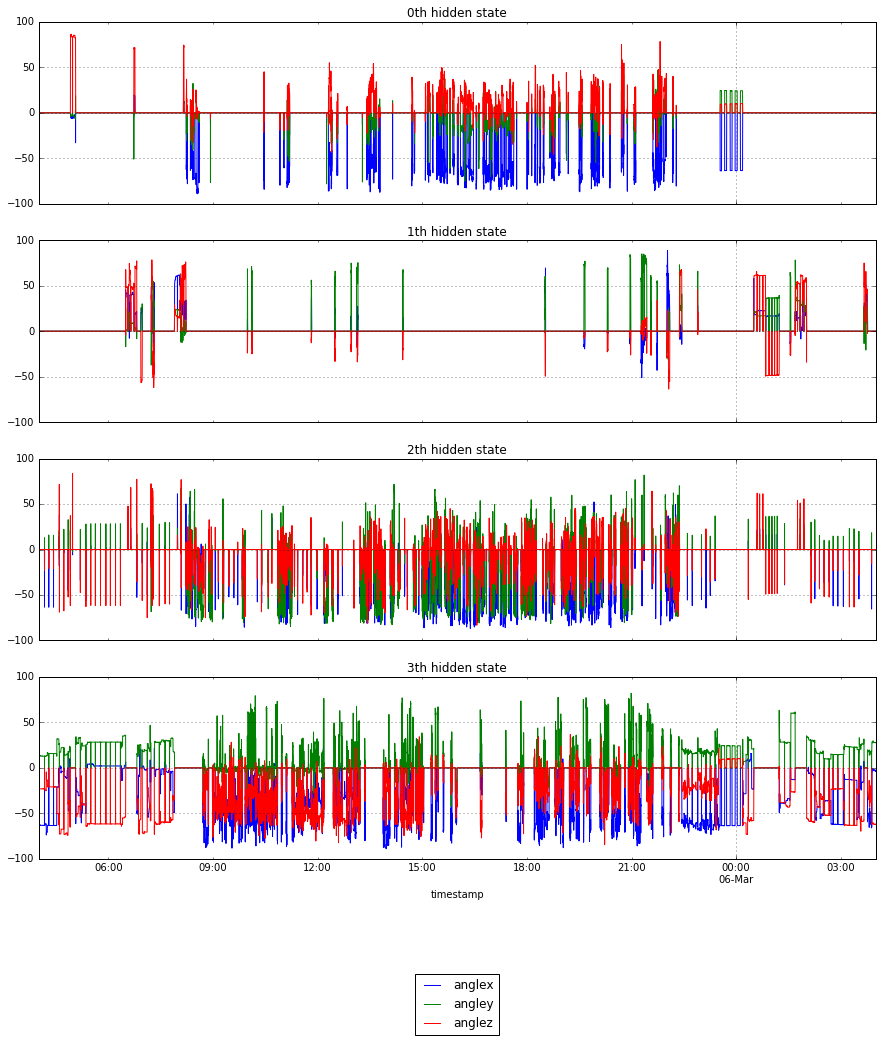

In [26]:
hsmm.plot_perstate(data[['anglex', 'angley', 'anglez']], hidden_states)

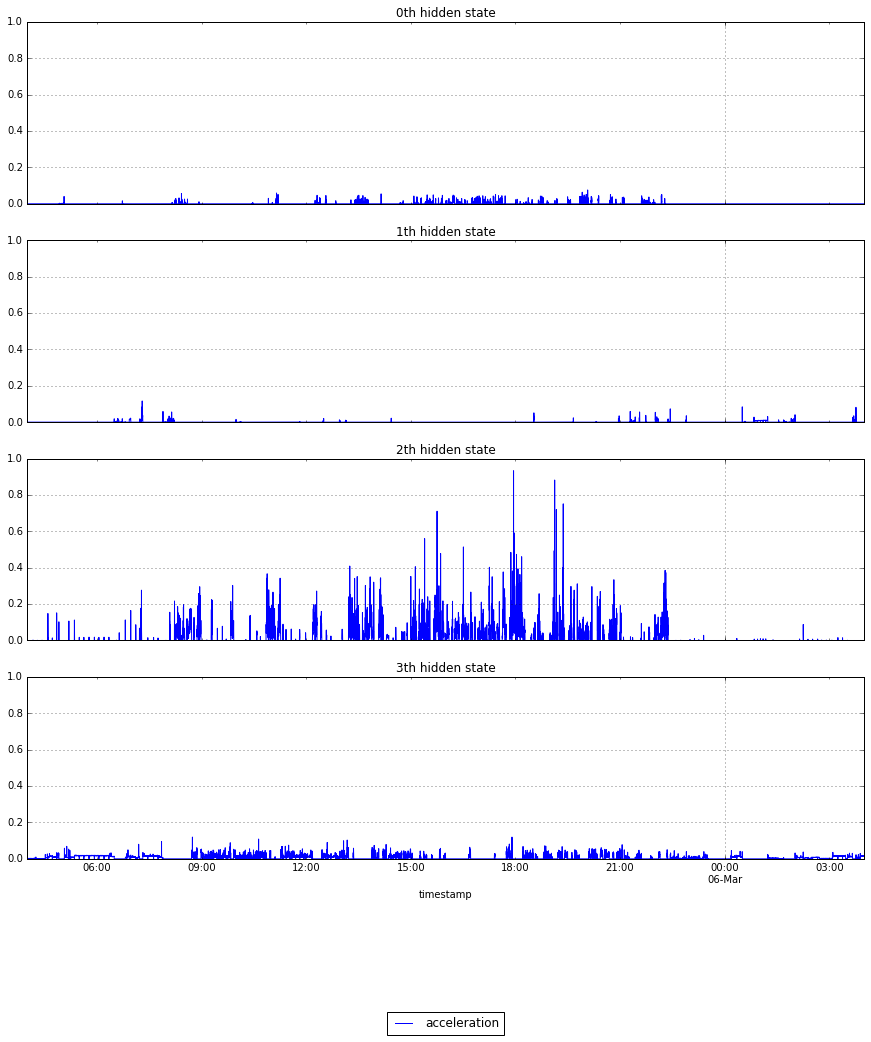

In [27]:
hsmm.plot_perstate(data[['acceleration']], hidden_states)

In [1]:
hsmm.plot_states_and_var(data, hidden_states, columns=['acceleration'], by='act_label')

NameError: name 'hsmm' is not defined

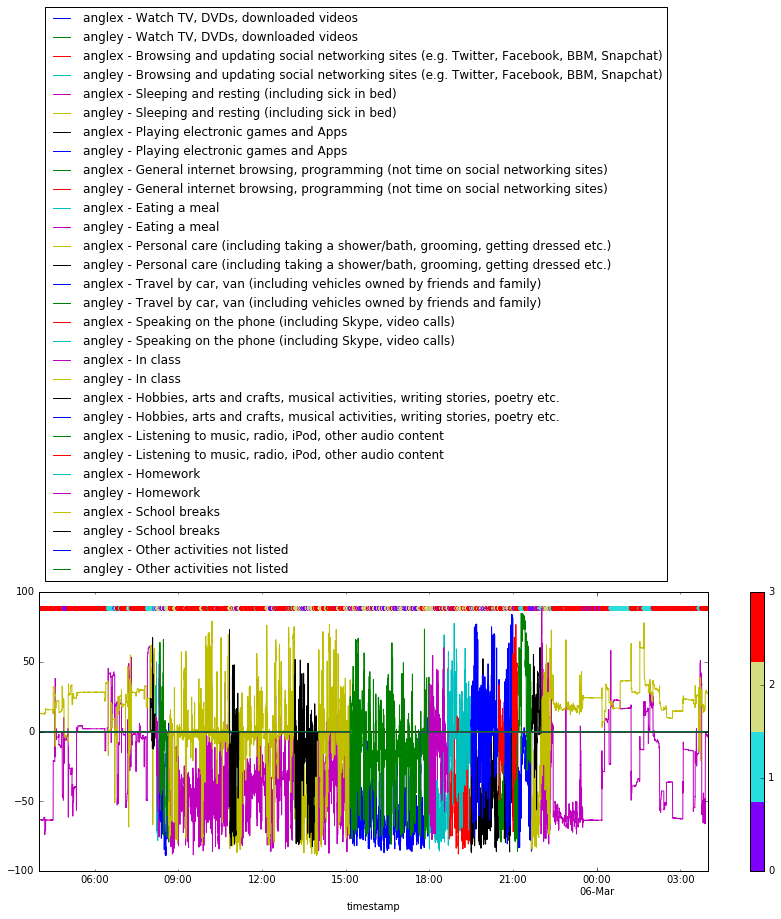

In [31]:
hsmm.plot_states_and_var(data, hidden_states, columns=['anglex', 'angley'], by='act_label')

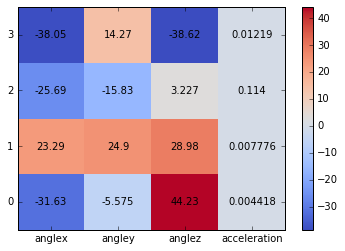

In [32]:
#Plot the means
plotdata = np.array([d.mu for d in model.obs_distns])

hsmm.plot_heatmap(plotdata, horizontal_labels=column_names)

In [33]:
pd.DataFrame(plotdata.transpose(), index=column_names)

,0,1,2,3
anglex,-31.627820,23.293084,-25.686264,-38.053614
angley,-5.575133,24.901840,-15.830803,14.271269
anglez,44.228859,28.975155,3.226598,-38.617328
acceleration,0.004418,0.007776,0.114025,0.012194


In [34]:
#Plot the mean of the acceleration
#plotdata2 = plotdata[:,3][:,np.newaxis]
#hsmm.plot_heatmap(plotdata2, column_names)

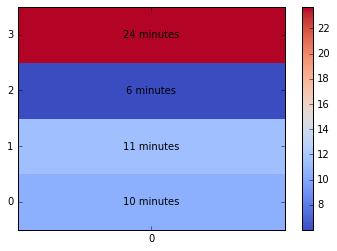

In [35]:
# Plot expected duration
plotdata = np.array([d.lmbda/3. for d in model.dur_distns])[:,np.newaxis]
#grouplabels = ["{:.3} minutes".format(x/3.) for x in plotdata[:,0]]
hsmm.plot_heatmap(plotdata, form='{:.0f} minutes')

Plot the covariance matrix for each state

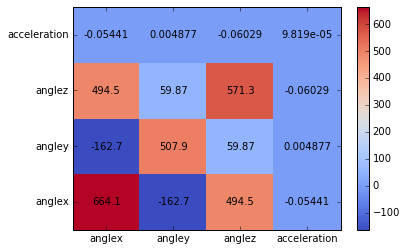

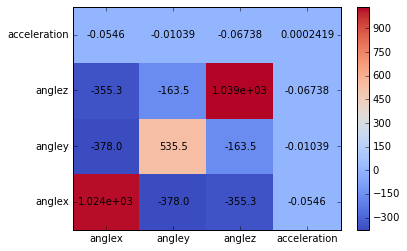

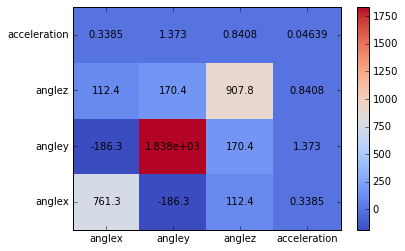

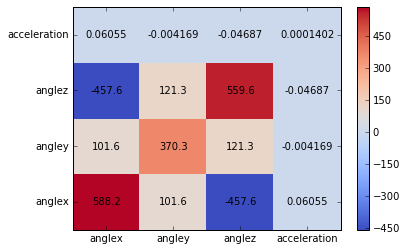

In [36]:
#fig, axs = plt.subplots(nrows=model.num_states, ncols=1,  figsize = (10, 15))
for i in range(model.num_states):
    plotdata = model.obs_distns[i].sigma
    #plt.sca(axs[i])
    hsmm.plot_heatmap(plotdata, horizontal_labels=column_names, vertical_labels=column_names)
#colorbar()
show()

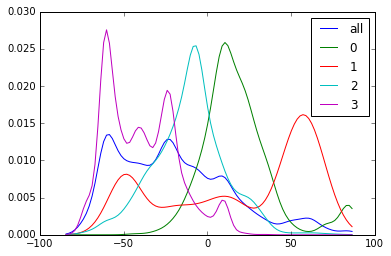

In [37]:
from scipy.stats.kde import gaussian_kde

variable = "anglez"#"acceleration"

fig, ax = subplots()
#day1_5sec.hist(variable, bins=100)
vals = data[variable]
kde = gaussian_kde(vals)
d = np.linspace(min(vals), max(vals), 100)
p = plot(d, kde(d), label="all")

for i in range(model.num_states):
    mask = hidden_states == i
    if(sum(mask)>0 and np.std(vals[mask])>0):
        kde = gaussian_kde(vals[mask])
        plot(d, kde(d), label=str(i))
#ax.set_xlim(0,0.1)
legend()
show()

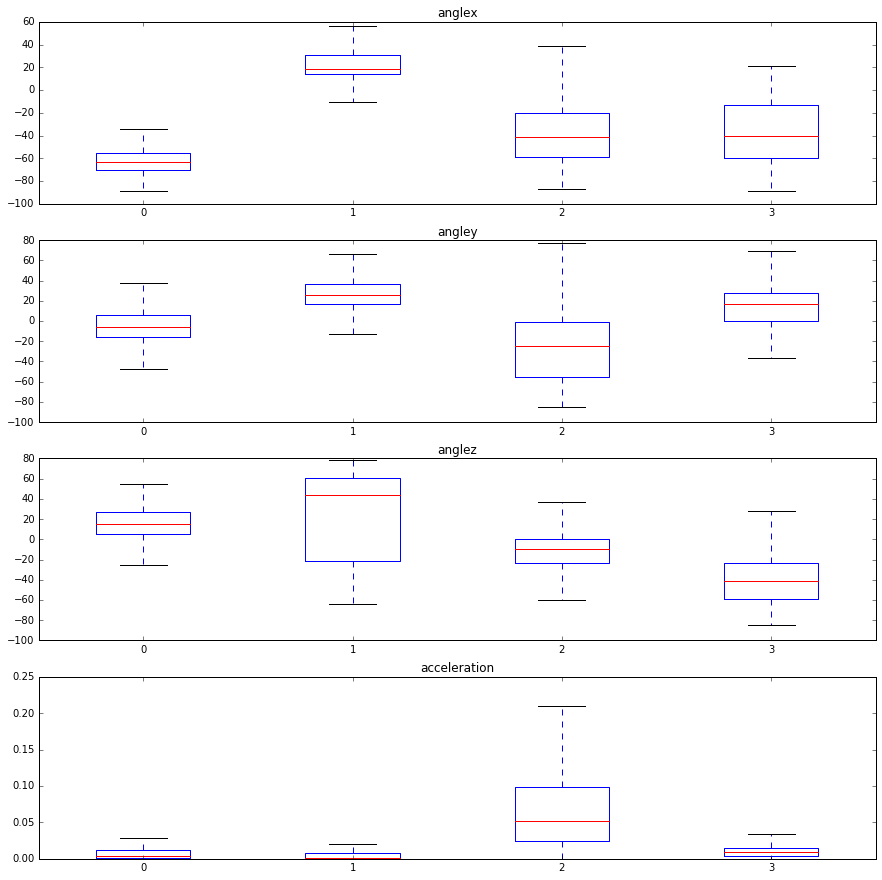

In [38]:
hsmm.plot_boxplots(data[column_names], hidden_states)

In [39]:
def getDurations(hidden_states, nr_states):
    durations = {i: [] for i in range(nr_states)}
    prev = hidden_states[0]
    d = 0
    for x in hidden_states:
        if x == prev:
            d += 1
        else:
            durations[prev].append(d)
            prev = x
            d = 0
    return durations

In [40]:
durations = getDurations(hidden_states, Nmax)
for i, d in durations.iteritems():
    if len(d)>0:
        datdur = np.mean(d)
        distdur = model.dur_distns[i].lmbda
        print('{}\t{:.1f}\t{:.1f}'.format(i, datdur, distdur))
    else:
        print(i)

0	18.6	31.4
1	36.3	34.0
2	15.3	18.1
3	66.5	71.2


In [41]:
all_hidden_states = np.array([s for m in model.stateseqs for s in m])
all_activities = np.array([s for d in datasets for s in list(np.array(d['act_label']))])
print(all_hidden_states.shape)
print(all_activities.shape)

(172620,)
(172620,)


In [42]:
ctab = pd.crosstab(all_activities, all_hidden_states, margins=True).sort_values('All', ascending=False)

In [43]:
ctab

col_0,0,1,2,3,All
row_0,,,,,
All,47944,33725,43033,47918,172620
Sleeping and resting (including sick in bed),28630,19435,5155,24360,77580
In class,5610,4752,7832,6286,24480
Reading (not for school),4514,1397,7311,1538,14760
Playing electronic games and Apps,805,440,966,4149,6360
"Speaking, socialising face-to-face",543,1277,2879,1421,6120
"Watch TV, DVDs, downloaded videos",419,1100,1452,2429,5400
"Personal care (including taking a shower/bath, grooming, getting dressed etc.)",1064,767,1920,1529,5280
Eating a meal,680,1169,1587,1124,4560


In [44]:
ind = list(ctab.index)
pd.crosstab(all_activities, all_hidden_states, normalize='index', margins=True).loc[ind]

col_0,0,1,2,3
row_0,,,,
All,0.277743,0.195371,0.249293,0.277592
Sleeping and resting (including sick in bed),0.369038,0.250516,0.066448,0.313998
In class,0.229167,0.194118,0.319935,0.256781
Reading (not for school),0.305827,0.094648,0.495325,0.104201
Playing electronic games and Apps,0.126572,0.069182,0.151887,0.652358
"Speaking, socialising face-to-face",0.088725,0.208660,0.470425,0.232190
"Watch TV, DVDs, downloaded videos",0.077593,0.203704,0.268889,0.449815
"Personal care (including taking a shower/bath, grooming, getting dressed etc.)",0.201515,0.145265,0.363636,0.289583
Eating a meal,0.149123,0.256360,0.348026,0.246491


In [54]:
all_acceleration = np.array([s for d in datasets for s in list(np.array(d['acceleration']))])
df_as = pd.DataFrame({'acc': all_acceleration, 'state': all_hidden_states})
df_as.groupby('state').mean().transpose()

state,0,1,2,3
acc,0.004532,0.007527,0.116542,0.012182


In [55]:
df_as.groupby('state').std().transpose()

state,0,1,2,3
acc,0.008868,0.013827,0.214879,0.01077


In [ ]:
print([d.lmbda*5.0/60 for d in model.dur_distns])

In [ ]:
len(model.dur_distns)

In [ ]:
model.trans_distn.full_trans_matrix.tofile(os.path.join(datadir, 'models/model_{}states_transmatrix'.format(Nmax)))